# Debugging the Neural Network

In [13]:
import pickle
import argparse
import json
import torch
import os 

os.chdir('/sietch_colab/akapoor/Demographic_Inference/')

from src.models import ShallowNN
from src.utils import plot_loss_curves
from src.train import MLPTrainer

In [14]:
experiment_directory = '/sietch_colab/akapoor/Demographic_Inference/split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42'
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/sims/sims_pretrain_500_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/sims/sims_pretrain_500_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'
features_file = '/sietch_colab/akapoor/Demographic_Inference/split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/sims/sims_pretrain_500_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl'

In [15]:
# Load model config (JSON)
with open(model_config_file, "r") as f:
    model_config = json.load(f)

# Load preprocessed data (Pickle)
with open(features_file, "rb") as f:
    features = pickle.load(f)

# Load color palettes/shades
with open(color_shades, "rb") as f:
    color_shades = pickle.load(f)
with open(main_colors, "rb") as f:
    main_colors = pickle.load(f)

# Unpack hyperparameters
nn_hyperparams = model_config["neural_net_hyperparameters"]

# Instantiate the ShallowNN model
mdl = ShallowNN(
    input_size=nn_hyperparams["input_size"],
    hidden_sizes=nn_hyperparams["hidden_size"],
    num_layers=nn_hyperparams["num_layers"],
    output_size=nn_hyperparams["output_size"],
    learning_rate=nn_hyperparams["learning_rate"],
    weight_decay=nn_hyperparams["weight_decay"],
    dropout_rate=nn_hyperparams["dropout_rate"],
    BatchNorm=nn_hyperparams["BatchNorm"],
)

# Create our trainer object
trainer = MLPTrainer(
    experiment_directory,
    model_config,
    color_shades,
    main_colors,
    param_names=nn_hyperparams["parameter_names"],
)

In [16]:
features['validation']['features']

,dadi_rep1_Na,moments_rep1_Na,moments_rep1_FIM_element_0,moments_rep1_FIM_element_1,moments_rep1_FIM_element_2,moments_rep1_FIM_element_3,moments_rep1_FIM_element_4,moments_rep1_FIM_element_5,moments_rep1_FIM_element_6,moments_rep1_FIM_element_7,...,dadi_rep2_N1,moments_rep2_N1,dadi_rep2_N2,moments_rep2_N2,dadi_rep2_t_split,moments_rep2_t_split,momentsLD_Na,momentsLD_N1,momentsLD_N2,momentsLD_t_split
0,25031.026809,25279.844174,-6.883478,-0.479748,4.318750,-2.597179,0.104567,-0.090893,0.565583,-0.205922,...,1664.185160,1687.560282,19566.009229,19716.523222,5375.949176,5462.758613,26065.787534,1699.589771,20081.255086,5544.219853
1,22665.085695,22686.905162,0.164575,-0.242037,-0.146692,0.082936,-0.019800,0.008900,-1.358375,0.259158,...,14444.680322,14739.707029,6363.994713,6485.724875,13039.593909,13317.874161,24284.052644,14856.783803,6686.655103,13543.971068
2,9731.190268,9908.337722,0.251810,0.276132,-0.247471,0.502633,0.118770,-0.169096,0.567343,0.281835,...,29414.080824,29703.159283,18967.100140,19200.067906,6874.149680,6940.161142,9948.147371,29952.248390,18958.179390,6959.170761
3,26286.578667,26383.311053,0.021813,-0.570006,-0.054611,-0.240099,-0.010283,-0.017708,-1.408639,0.264998,...,11347.392337,11296.457155,8493.897656,8484.003096,17388.098856,17025.670680,12630.297303,19262.670403,6699.129237,10882.657535
4,25715.647973,26003.694968,-0.317454,-0.097624,0.184755,-1.689645,0.105034,-0.139790,0.155115,0.246253,...,6856.737085,6923.875500,25428.012036,25645.344339,15696.369046,15826.731971,15859.960359,17712.399235,15097.433124,6771.682493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,15681.201800,15905.037987,0.238088,0.212878,-0.197382,0.451788,0.113000,-0.137771,0.426956,0.203206,...,19924.776421,20117.299552,16604.387509,16774.004189,7214.930314,7270.599049,15994.537704,21918.425119,2457.829000,10255.880027
90,8268.951127,8416.737904,0.251297,0.277790,-0.251193,0.488326,0.119178,-0.174906,0.476965,0.316624,...,24000.646987,24270.752835,19006.604096,19233.042724,8834.396686,8923.529114,15242.914050,23727.577030,14315.994058,15590.279041
91,19255.804071,19460.828666,0.205680,-0.017978,-0.219974,0.051613,-0.103504,-0.064159,-4.722171,0.320757,...,16745.721474,17747.881391,3487.084417,3609.653404,17160.214055,17969.815793,14330.083981,16982.433935,8425.670167,17244.552753
92,3493.273517,3559.686613,0.252121,0.285190,-0.255257,0.506411,0.120458,-0.180180,0.559943,0.332107,...,7802.216194,7912.549452,15341.981751,15512.588671,3929.086157,3975.462005,12303.815889,1677.204596,9834.158456,15120.562786


In [ ]:
# Train
snn_model, train_losses, val_losses = trainer.train(
    model=mdl,
    X_train=features["training"]["features"],
    y_train=features["training"]["targets"],
    X_val=features["validation"]["features"],
    y_val=features["validation"]["targets"],
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | network   | Sequential | 1.0 M  | train
1 | criterion | MSELoss    | 0      | train
-------------------------------------------------
1.0 M     Trainable params
0         Non-trainable params
1.0 M     Total params
4.184     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/akapoor/miniconda3/envs/myenv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=255` in the `DataLoader` to improve performance.
/home/akapoor/miniconda3/envs/myenv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=255` in the `DataLoader` to improve performance.
/home/akapoor/miniconda3/envs/myenv/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


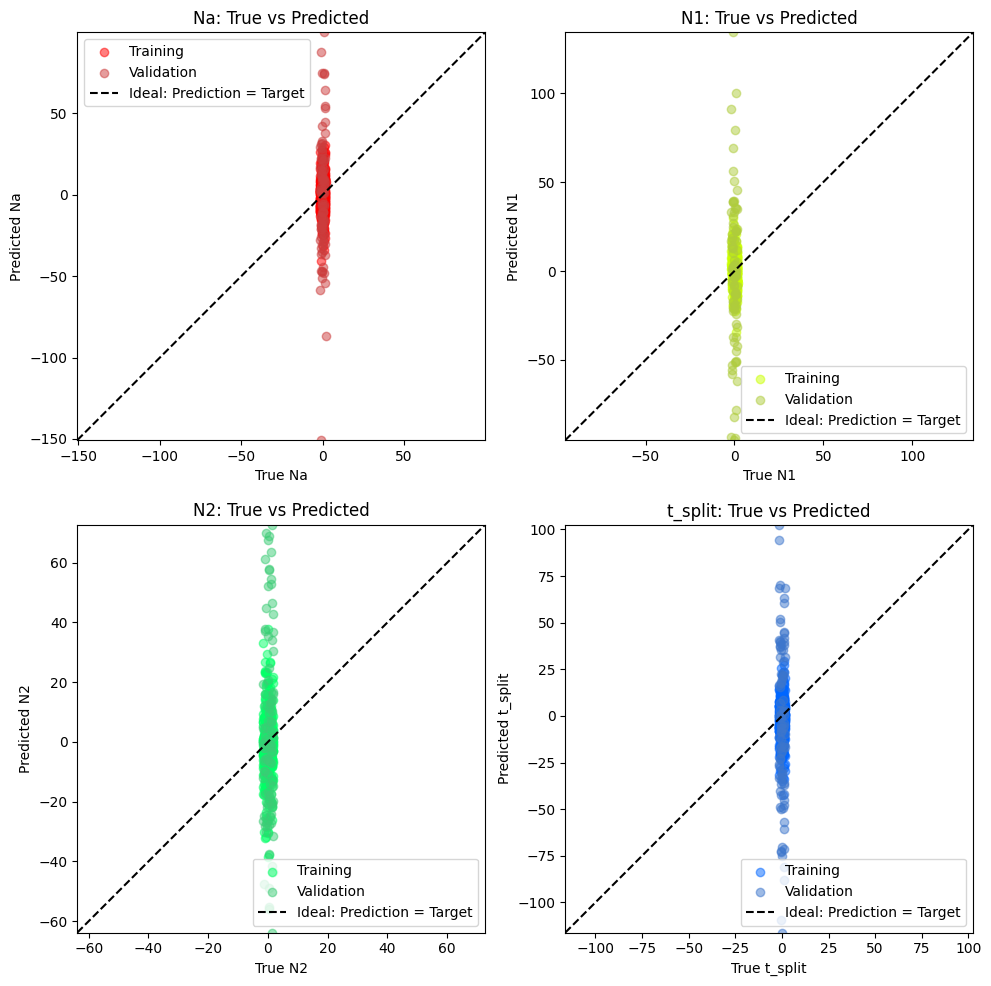

[168.35285435 196.45465467 180.98533385 132.19949485 212.99623673
  44.79881116   9.53180247 203.86932967 139.99233868 127.23019377
  22.23620517  73.0974149  280.33130897  18.14353775 103.61434487
 148.30087336 106.98375735  23.23006282 153.51785826 108.03141992
  28.41004874  26.84507759 332.43192925 318.13045619 194.41778235
  48.72977606  96.05948175  72.48753906 197.68088589 127.10190436
  18.70016981 218.91773788  51.77453484 311.2663573   12.34883615
  76.76209783  32.69513851 182.49146775 165.4385041  673.57799991
 324.41229403 227.99688225 249.39310516 441.66190272  68.23300965
  45.02791552  27.92779305  13.26989272  27.66658205  66.15217476
 117.61760008 120.22647658 336.74834969  40.66972185  17.61588897
 151.54487001 215.20254483 130.85593544  14.69544285  66.44746363
 182.8197962   39.67110037  54.42581516 327.34138244  22.65518023
 109.19042301  84.22852114  21.42810798  40.16260658  50.72525502
 131.17574973 169.46231577 125.87874425 139.01404502  11.82981204
  23.08542

In [18]:
# Predict + Visualization
snn_results = trainer.predict(
    model=snn_model,
    training_data=features["training"]["features"],
    validation_data=features["validation"]["features"],
    training_targets=features["training"]["targets"],
    validation_targets=features["validation"]["targets"],
    visualize=True,
)

In [20]:
features["training"]["features"].shape

(375, 40)

Epoch [50/10000], Train Loss: 443.628448, Val Loss: 583.343506
Epoch [100/10000], Train Loss: 161.892212, Val Loss: 371.385590
Epoch [150/10000], Train Loss: 88.513626, Val Loss: 319.727142
Epoch [200/10000], Train Loss: 58.090790, Val Loss: 290.059357
Epoch [250/10000], Train Loss: 43.146568, Val Loss: 277.640594
Epoch [300/10000], Train Loss: 34.150150, Val Loss: 266.597107
Epoch [350/10000], Train Loss: 27.977177, Val Loss: 257.356232
Epoch [400/10000], Train Loss: 23.325102, Val Loss: 250.080292
Epoch [450/10000], Train Loss: 19.579607, Val Loss: 243.589783
Epoch [500/10000], Train Loss: 16.630255, Val Loss: 238.599884
Epoch [550/10000], Train Loss: 14.372221, Val Loss: 233.551834
Epoch [600/10000], Train Loss: 12.521323, Val Loss: 231.207077
Epoch [650/10000], Train Loss: 11.077586, Val Loss: 231.550858
Epoch [700/10000], Train Loss: 9.790298, Val Loss: 231.416428
Epoch [750/10000], Train Loss: 8.781675, Val Loss: 233.165451
Epoch [800/10000], Train Loss: 7.996589, Val Loss: 231.5

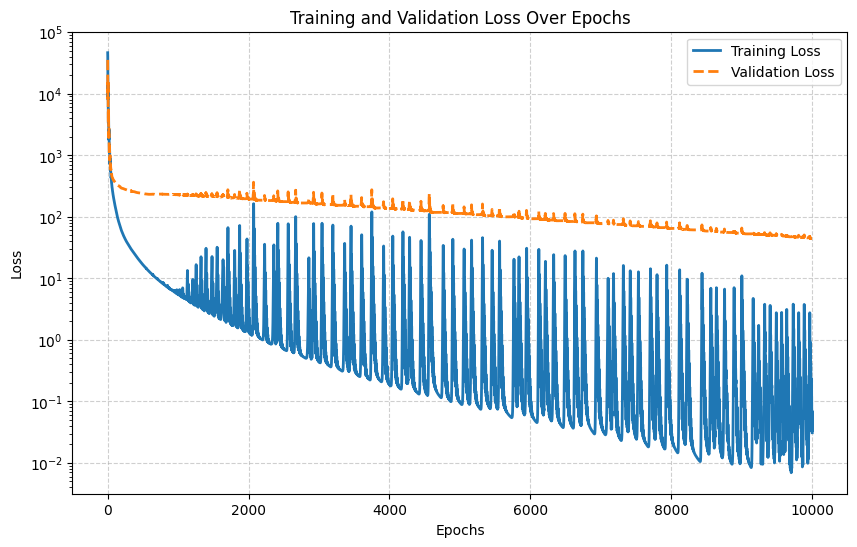

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -------------------------
# 1) Create random dataset (single batch for training and validation)
# -------------------------
X_train = torch.tensor(features["training"]["features"].to_numpy()).float()
y_train = torch.tensor(features["training"]["targets"].to_numpy()).float()

X_val = torch.tensor(features["validation"]["features"].to_numpy()).float()
y_val = torch.tensor(features["validation"]["targets"].to_numpy()).float()

# -------------------------
# 2) Define a simple MLP
# -------------------------
class SimpleMLP(nn.Module):
    def __init__(self, input_dim=40, hidden_dim=100, output_dim=4):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
model = SimpleMLP(input_dim=40, hidden_dim=100, output_dim=4)

# -------------------------
# 3) Choose a loss function and optimizer
# -------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

# -------------------------
# 4) Training loop with validation
# -------------------------
num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training step
    model.train()  # Set model to training mode
    optimizer.zero_grad()
    train_predictions = model(X_train)
    train_loss = criterion(train_predictions, y_train)
    train_loss.backward()
    optimizer.step()

    # Validation step
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_predictions = model(X_val)
        val_loss = criterion(val_predictions, y_val)

    # Store losses
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    # Print loss occasionally
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.6f}, Val Loss: {val_loss.item():.6f}")

# -------------------------
# 5) Plot the losses
# -------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss", linewidth=2)
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", linewidth=2, linestyle="--")
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [56]:
predictions.shape

torch.Size([375, 4])

In [57]:
predicted_values

array([  1.4337662 ,  -2.7887182 ,   2.7590685 ,  -0.01842796,
        -0.2891761 ,  -1.5853797 ,   1.1376847 ,  -4.172908  ,
        -0.4552356 ,   3.3230295 ,  -3.6325674 ,   2.413827  ,
        -1.8466846 ,  -3.0253553 ,   5.7753553 ,  -2.046813  ,
         2.0937319 ,   1.9053963 ,   0.53403556,   6.4176416 ,
         0.23266876,   5.0467424 ,  -7.4431906 , -11.735499  ,
        -2.9202032 ,  -2.5051718 ,   3.3765783 ,  -1.7937881 ,
        -2.837842  ,  -0.38327706,  -0.6103126 ,   1.1216553 ,
         1.5516557 ,   7.5087976 ,  -2.213935  ,  -6.1741934 ,
        -0.7116691 ,   1.9922646 ,  -1.0259238 ,   1.1979474 ,
        -0.8814384 ,  -7.234992  ,   1.7255944 ,  -0.30146706,
        -1.8246833 ,   2.0928736 ,  -1.8998939 ,  -0.2857734 ,
        -2.0291662 ,  -0.7270061 ,  -2.445744  ,  -0.12794411,
        -2.1256857 ,  -2.1979513 ,   2.8678522 ,  -0.52877724,
        -1.3768531 ,   0.55321205,  -0.480178  ,  -3.1561995 ,
         1.4901417 ,   1.8140496 ,  -4.0751715 ,  -1.00

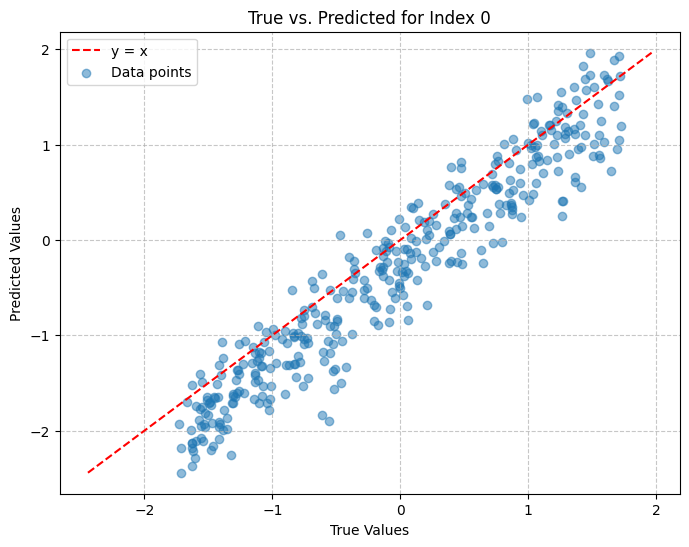

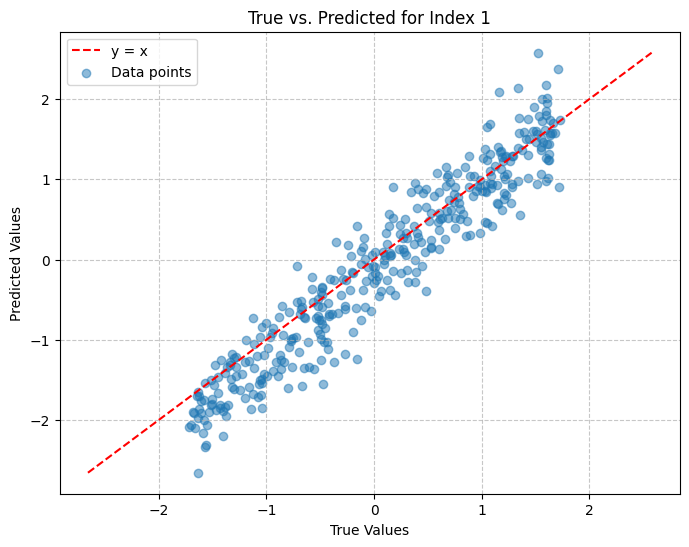

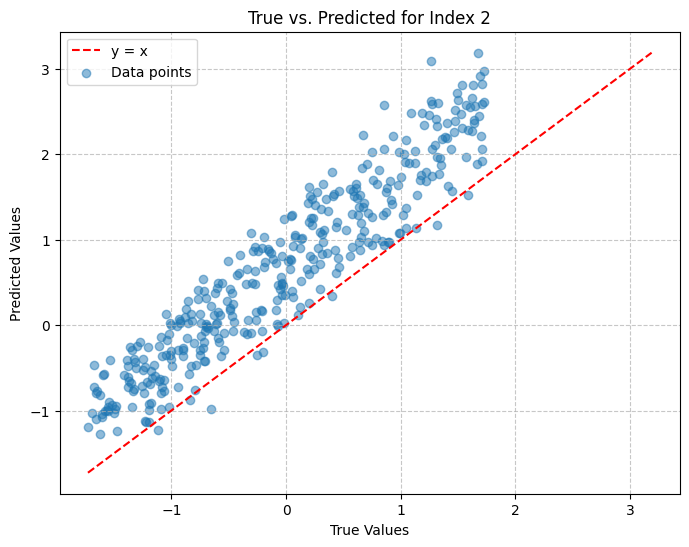

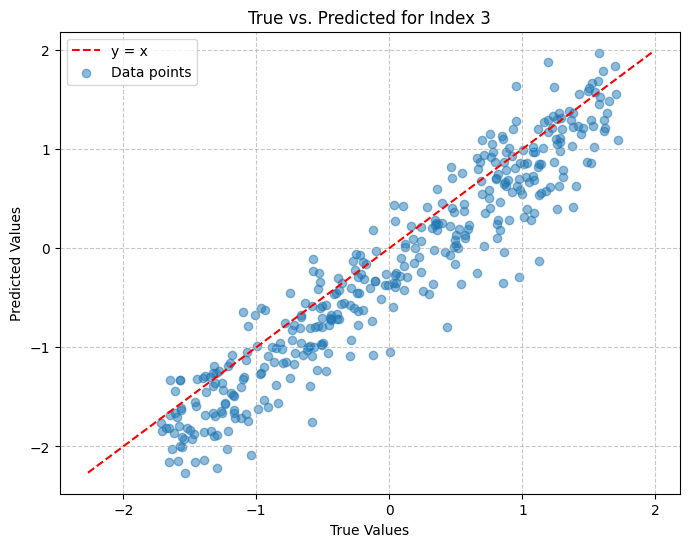

In [58]:
import matplotlib.pyplot as plt

# Assuming you want to loop through indices 0 to 3
for i in range(4):
    plt.figure(figsize=(8, 6))  # Set figure size for each plot

    # Ensure y and predictions are detached and converted to NumPy arrays
    true_values = y[:, i].detach().numpy()
    predicted_values = predictions[:, i].detach().numpy()

    # Plot the y = x line for reference
    min_val = min(true_values.min(), predicted_values.min())
    max_val = max(true_values.max(), predicted_values.max())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="y = x")

    # Scatter plot of True vs Predicted
    plt.scatter(true_values, predicted_values, alpha=0.5, label="Data points")

    # Add labels, title, and legend
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"True vs. Predicted for Index {i}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)  # Add a light grid for better readability

    # Display the plot
    plt.show()
